In [636]:
# %%
import pandas as pd
import numpy as np


# %%

path = r"C:\DataMining\Examen01\data\raw"

dataset = {
    "dfCalls": pd.read_csv(path + r"\megaline_calls.csv"),
    "dfInternet": pd.read_csv(path + r"\megaline_internet.csv"),
    "dfMessages": pd.read_csv(path + r"\megaline_messages.csv"),
    "dfPlans": pd.read_csv(path + r"\megaline_plans.csv"),
    "dfUsers": pd.read_csv(path + r"\megaline_users.csv")
}

# %% [markdown]
# # Check functions
# 

# %%
# check for nan values 
def checkNan(df):
    for feature in df.columns:
        print(df[feature].value_counts(dropna=False))
        

# %%
#check column datat type
def checkDataType(df):
    for feature in df.columns:
        t=type(df[feature][0])
        print(feature+": "+str(t))

# %% [markdown]
# ### Eliminacion de Duplicados
# 

# %%
for table in dataset:
    dataset[table].drop_duplicates()

# %% [markdown]
# ## Calls EDA

# %%
dfCalls=dataset["dfCalls"]
print(dfCalls.shape)
dfCalls

# %% [markdown]
# Implementation of QRI for the outliers of call duration

# %%

Q1 = dfCalls['duration'].quantile(0.25)
Q3 = dfCalls['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# %%
dfCalls = dfCalls[(dfCalls['duration'] >= lower_bound) & (dfCalls['duration'] <= upper_bound)]

# %%
dfCalls

# %% [markdown]
# Conversion de call_date de str a date

# %%
#convert str to date
dfCalls["call_date"]=pd.to_datetime(dfCalls["call_date"])
dfCalls["call_month"] = dfCalls["call_date"].dt.month
dfCalls.drop(columns=["call_date"],inplace=True)
dfCalls

# %%
dataset["dfCalls"]=dfCalls

# %% [markdown]
# ## dfInternet EDA

# %%
dfInternet=dataset["dfInternet"]

# %%
dfInternet

# %%
checkDataType(dfInternet)

# %%
checkNan(dfInternet)

# %%

Q1 = dfInternet['mb_used'].quantile(0.25)
Q3 = dfInternet['mb_used'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# %%
dfInternet.shape

# %%
dfInternet = dfInternet[(dfInternet['mb_used'] >= lower_bound) & (dfInternet['mb_used'] <= upper_bound)]

# %%
dfInternet.shape

# %%
dfInternet

# %% [markdown]
# Cambiar el tipo de date porque esta en string

# %%
dfInternet["session_date"]=pd.to_datetime(dfInternet["session_date"])

dfInternet["session_month"] = dfInternet["session_date"].dt.month

dfInternet.drop(columns=["session_date"],inplace=True)

dfInternet

# %%
dataset["dfInternet"]=dfInternet

# %% [markdown]
# ## Messages EDA

# %%
dfMessages=dataset["dfMessages"]

# %%
dfMessages

# %%
checkDataType(dfMessages)

# %%
checkNan(dfMessages)

# %%
dfMessages

# %%
dfMessages["message_date"]=pd.to_datetime(dfMessages["message_date"])

dfMessages["message_month"] = dfMessages["message_date"].dt.month

dfMessages.drop(columns=["message_date"],inplace=True)

dfMessages


# %%
dataset["dfMessages"]=dfMessages

# %% [markdown]
# ## Plans EDA

# %%
dfPlans=dataset["dfPlans"]

# %%
dfPlans

# %%
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# %%
# Fit and transform the 'plan' column
dfPlans['plan_name_encoded'] = label_encoder.fit_transform(dfPlans['plan_name'])

# Display the first few rows to see the result
print(dfPlans[['plan_name', 'plan_name_encoded']].head())

# %%
dfPlans

# %% [markdown]
# update usd_per_gb per usd_per_mb

# %%
usd_per_mb=dfPlans["usd_per_gb"]/1000
dfPlans["usd_per_mb"]=usd_per_mb
dfPlans.drop(columns=["usd_per_gb"],inplace=True)

# %%
checkDataType(dfPlans)

# %% [markdown]
# ## Users EDA

# %%
dfUsers=dataset["dfUsers"]

# %%
dfUsers

# %%
dfUsers['plan_encoded'] = label_encoder.fit_transform(dfUsers['plan'])

print(dfUsers[['plan', 'plan_encoded']].head())

# %%
dfUsers

# %%
dfUsers["churn_date"].value_counts(dropna=False)

# %% [markdown]
# Drop firstname and last name

# %%
dfUsers=dfUsers.drop(columns=["first_name","last_name","reg_date","churn_date","plan","city","age"])

# %%




(137735, 4)
-12.809999999999999
24.79
id: <class 'str'>
user_id: <class 'numpy.int64'>
session_date: <class 'str'>
mb_used: <class 'numpy.float64'>
id
1499_219    1
1000_13     1
1000_204    1
1000_379    1
1000_413    1
           ..
1001_25     1
1001_24     1
1001_17     1
1001_16     1
1001_15     1
Name: count, Length: 104825, dtype: int64
user_id
1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1108      2
1034      2
1306      1
1452      1
Name: count, Length: 489, dtype: int64
session_date
2018-12-24    851
2018-12-30    845
2018-12-27    830
2018-12-21    826
2018-12-31    823
             ... 
2018-01-23      3
2018-01-15      2
2018-01-16      2
2018-01-20      2
2018-01-18      2
Name: count, Length: 351, dtype: int64
mb_used
0.00       13747
435.77         8
414.46         8
355.33         7
508.15         7
           ...  
289.17         1
1444.97        1
445.68         1
354.02         1
656.04         1
Name: count, Length: 57624, d

C:\Users\elian\AppData\Local\Temp\ipykernel_5252\2142615554.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCalls["call_date"]=pd.to_datetime(dfCalls["call_date"])
C:\Users\elian\AppData\Local\Temp\ipykernel_5252\2142615554.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCalls["call_month"] = dfCalls["call_date"].dt.month
C:\Users\elian\AppData\Local\Temp\ipykernel_5252\2142615554.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

  plan_name  plan_name_encoded
0      surf                  0
1  ultimate                  1
messages_included: <class 'numpy.int64'>
mb_per_month_included: <class 'numpy.int64'>
minutes_included: <class 'numpy.int64'>
usd_monthly_pay: <class 'numpy.int64'>
usd_per_message: <class 'numpy.float64'>
usd_per_minute: <class 'numpy.float64'>
plan_name: <class 'str'>
plan_name_encoded: <class 'numpy.int64'>
usd_per_mb: <class 'numpy.float64'>
       plan  plan_encoded
0  ultimate             1
1      surf             0
2      surf             0
3      surf             0
4      surf             0


# Star Schema

Indicar como las tablas de usuarios, planes y consumos se relacionan para conformar una tabla de hechos que contenga el costo total por usuario y periodo.

In [637]:
dfCalls = dfCalls.groupby(["user_id", "call_month"])["duration"].sum().reset_index()
dfCalls

,user_id,call_month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,374.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [638]:
dfInternet = dfInternet.groupby(["user_id", "session_month"])["mb_used"].sum().reset_index()
dfInternet

,user_id,session_month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,15580.97


In [639]:
dfUsers_selected = dfUsers[['user_id', 'plan_encoded']]

# Realiza una unión (merge) de dfCalls con dfUsers usando user_id como clave
dfCalls_with_plan = dfCalls.merge(dfUsers_selected, on='user_id', how='left')

dfCalls=dfCalls_with_plan

In [640]:
dfCalls

,user_id,call_month,duration,plan_encoded
0,1000,12,116.83,1
1,1001,8,171.14,0
2,1001,9,297.69,0
3,1001,10,374.11,0
4,1001,11,374.59,0
...,...,...,...,...
2253,1498,12,324.77,0
2254,1499,9,330.37,0
2255,1499,10,363.28,0
2256,1499,11,288.56,0


In [641]:
def calculate_total_cost_minutes(df):
    label_cero_cost=0.03
    label_one_cost=0.01

    totalcost=[]

    for index, row in df.iterrows():
        if row["plan_encoded"]==0:
            if row["duration"]>500:
                totalcost.append((row["duration"]-500)*label_cero_cost)
            else:
                totalcost.append(row["duration"]*label_cero_cost)
        else:
            if row["duration"]>3000:
                totalcost.append((row["duration"]-3000)*label_one_cost)
            else:
                totalcost.append(row["duration"]*label_one_cost)
            
    return totalcost








In [642]:
dfCalls["totalcost"]=calculate_total_cost_minutes(dfCalls)

In [643]:
dfCalls

,user_id,call_month,duration,plan_encoded,totalcost
0,1000,12,116.83,1,1.1683
1,1001,8,171.14,0,5.1342
2,1001,9,297.69,0,8.9307
3,1001,10,374.11,0,11.2233
4,1001,11,374.59,0,11.2377
...,...,...,...,...,...
2253,1498,12,324.77,0,9.7431
2254,1499,9,330.37,0,9.9111
2255,1499,10,363.28,0,10.8984
2256,1499,11,288.56,0,8.6568


In [644]:
dfInternet

,user_id,session_month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,15580.97


In [645]:
dfUsers_selected = dfUsers[['user_id', 'plan_encoded']]

dfInternet_with_plan = dfInternet.merge(dfUsers_selected, on='user_id', how='left')
                                        
dfInternet=dfInternet_with_plan




In [646]:
dfInternet

,user_id,session_month,mb_used,plan_encoded
0,1000,12,1901.47,1
1,1001,8,6919.15,0
2,1001,9,13314.82,0
3,1001,10,22330.49,0
4,1001,11,18504.30,0
...,...,...,...,...
2272,1498,12,23137.69,0
2273,1499,9,12984.76,0
2274,1499,10,19492.43,0
2275,1499,11,15580.97,0


In [647]:
def calculate_total_cost_internet(df):
    label_cero_cost=0.001
    label_one_cost=0.007

    totalcost=[]

    for index, row in df.iterrows():
        if row["plan_encoded"]==0:
            if row["mb_used"]>500:
                totalcost.append((row["mb_used"]-500)*label_cero_cost)
            else:
                totalcost.append(row["mb_used"]*label_cero_cost)
        else:
            if row["mb_used"]>3000:
                totalcost.append((row["mb_used"]-3000)*label_one_cost)
            else:
                totalcost.append(row["mb_used"]*label_one_cost)
            
    return totalcost








In [648]:
dfInternet["totalcost"]=calculate_total_cost_internet(dfInternet)

In [649]:
dfInternet

,user_id,session_month,mb_used,plan_encoded,totalcost
0,1000,12,1901.47,1,13.31029
1,1001,8,6919.15,0,6.41915
2,1001,9,13314.82,0,12.81482
3,1001,10,22330.49,0,21.83049
4,1001,11,18504.30,0,18.00430
...,...,...,...,...,...
2272,1498,12,23137.69,0,22.63769
2273,1499,9,12984.76,0,12.48476
2274,1499,10,19492.43,0,18.99243
2275,1499,11,15580.97,0,15.08097


In [650]:
dfMessages

,id,user_id,message_month
0,1000_125,1000,12
1,1000_160,1000,12
2,1000_223,1000,12
3,1000_251,1000,12
4,1000_255,1000,12
...,...,...,...
76046,1497_526,1497,12
76047,1497_536,1497,12
76048,1497_547,1497,12
76049,1497_558,1497,12


In [651]:
dfMessages = dfMessages.groupby(['user_id', 'message_month']).size().reset_index(name='message_count')
dfMessages

,user_id,message_month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [652]:
# Selecciona solo las columnas necesarias de dfUsers
dfUsers_selected = dfUsers[['user_id', 'plan_encoded']]

# Realiza una unión (merge) de dfMessages con dfUsers usando user_id como clave
dfMessages_with_plan = dfMessages.merge(dfUsers_selected, on='user_id', how='left')

dfMessages=dfMessages_with_plan


In [653]:
dfMessages

,user_id,message_month,message_count,plan_encoded
0,1000,12,11,1
1,1001,8,30,0
2,1001,9,44,0
3,1001,10,53,0
4,1001,11,36,0
...,...,...,...,...
1801,1496,9,21,0
1802,1496,10,18,0
1803,1496,11,13,0
1804,1496,12,11,0


In [654]:
def calculate_total_cost_messages(df):
    label_cero_cost=0.03
    label_one_cost=0.01

    totalcost=[]

    for index, row in df.iterrows():
        if row["plan_encoded"]==0:
            if row["message_count"]>500:
                totalcost.append((row["message_count"]-15360)*label_cero_cost)
            else:
                totalcost.append(row["message_count"]*label_cero_cost)
        else:
            if row["message_count"]>3000:
                totalcost.append((row["message_count"]-30720)*label_one_cost)
            else:
                totalcost.append(row["message_count"]*label_one_cost)
            
    return totalcost








In [655]:
dfMessages["totalcost"]=calculate_total_cost_messages(dfMessages)

In [656]:
dfMessages

,user_id,message_month,message_count,plan_encoded,totalcost
0,1000,12,11,1,0.11
1,1001,8,30,0,0.90
2,1001,9,44,0,1.32
3,1001,10,53,0,1.59
4,1001,11,36,0,1.08
...,...,...,...,...,...
1801,1496,9,21,0,0.63
1802,1496,10,18,0,0.54
1803,1496,11,13,0,0.39
1804,1496,12,11,0,0.33


In [657]:
dfPlans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_message,usd_per_minute,plan_name,plan_name_encoded,usd_per_mb
0,50,15360,500,20,0.03,0.03,surf,0,0.010
1,1000,30720,3000,70,0.01,0.01,ultimate,1,0.007


In [658]:
dfUsers

,user_id,plan_encoded
0,1000,1
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
495,1495,0
496,1496,0
497,1497,1
498,1498,0


## Sum of Costs

In [659]:
#change name of column 

dfCalls.rename(columns={"call_month":"month"},inplace=True)
dfInternet.rename(columns={"session_month":"month"},inplace=True)
dfMessages.rename(columns={"message_month":"month"},inplace=True)

In [660]:
dfCalls

,user_id,month,duration,plan_encoded,totalcost
0,1000,12,116.83,1,1.1683
1,1001,8,171.14,0,5.1342
2,1001,9,297.69,0,8.9307
3,1001,10,374.11,0,11.2233
4,1001,11,374.59,0,11.2377
...,...,...,...,...,...
2253,1498,12,324.77,0,9.7431
2254,1499,9,330.37,0,9.9111
2255,1499,10,363.28,0,10.8984
2256,1499,11,288.56,0,8.6568


In [661]:
dfInternet

,user_id,month,mb_used,plan_encoded,totalcost
0,1000,12,1901.47,1,13.31029
1,1001,8,6919.15,0,6.41915
2,1001,9,13314.82,0,12.81482
3,1001,10,22330.49,0,21.83049
4,1001,11,18504.30,0,18.00430
...,...,...,...,...,...
2272,1498,12,23137.69,0,22.63769
2273,1499,9,12984.76,0,12.48476
2274,1499,10,19492.43,0,18.99243
2275,1499,11,15580.97,0,15.08097


In [662]:
dfMessages

,user_id,month,message_count,plan_encoded,totalcost
0,1000,12,11,1,0.11
1,1001,8,30,0,0.90
2,1001,9,44,0,1.32
3,1001,10,53,0,1.59
4,1001,11,36,0,1.08
...,...,...,...,...,...
1801,1496,9,21,0,0.63
1802,1496,10,18,0,0.54
1803,1496,11,13,0,0.39
1804,1496,12,11,0,0.33


In [663]:
#merge based on user_id and month

dfTotal=dfCalls.merge(dfInternet, on=["user_id","month","plan_encoded"], how="outer")
dfTotal=dfTotal.merge(dfMessages, on=["user_id","month","plan_encoded"], how="outer")



In [664]:
dfTotal

,user_id,month,duration,plan_encoded,totalcost_x,mb_used,totalcost_y,message_count,totalcost
0,1000,12,116.83,1,1.1683,1901.47,13.31029,11.0,0.11
1,1001,8,171.14,0,5.1342,6919.15,6.41915,30.0,0.90
2,1001,9,297.69,0,8.9307,13314.82,12.81482,44.0,1.32
3,1001,10,374.11,0,11.2233,22330.49,21.83049,53.0,1.59
4,1001,11,374.59,0,11.2377,18504.30,18.00430,36.0,1.08
...,...,...,...,...,...,...,...,...,...
2288,1498,12,324.77,0,9.7431,23137.69,22.63769,NaN,NaN
2289,1499,9,330.37,0,9.9111,12984.76,12.48476,NaN,NaN
2290,1499,10,363.28,0,10.8984,19492.43,18.99243,NaN,NaN
2291,1499,11,288.56,0,8.6568,15580.97,15.08097,NaN,NaN


In [665]:
dfTotal.drop(columns=["duration","mb_used","message_count","plan_encoded"],inplace=True)

In [666]:
#replace Nan by 0
dfTotal["totalcost"].fillna(0,inplace=True)

C:\Users\elian\AppData\Local\Temp\ipykernel_5252\3587567221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfTotal["totalcost"].fillna(0,inplace=True)


In [667]:

dfTotal

,user_id,month,totalcost_x,totalcost_y,totalcost
0,1000,12,1.1683,13.31029,0.11
1,1001,8,5.1342,6.41915,0.90
2,1001,9,8.9307,12.81482,1.32
3,1001,10,11.2233,21.83049,1.59
4,1001,11,11.2377,18.00430,1.08
...,...,...,...,...,...
2288,1498,12,9.7431,22.63769,0.00
2289,1499,9,9.9111,12.48476,0.00
2290,1499,10,10.8984,18.99243,0.00
2291,1499,11,8.6568,15.08097,0.00


In [668]:
total=dfTotal["totalcost"]+dfTotal["totalcost_x"]+dfTotal["totalcost_y"]

In [669]:
dfTotal.drop(columns=["totalcost","totalcost_x","totalcost_y"],inplace=True)

In [670]:
dfTotal["totalcost"]=total

In [671]:
dfTotal

,user_id,month,totalcost
0,1000,12,14.58859
1,1001,8,12.45335
2,1001,9,23.06552
3,1001,10,34.64379
4,1001,11,30.32200
...,...,...,...
2288,1498,12,32.38079
2289,1499,9,22.39586
2290,1499,10,29.89083
2291,1499,11,23.73777


In [672]:
# Selecciona solo las columnas necesarias de dfUsers
dfUsers_selected = dfUsers[['user_id', 'plan_encoded']]

# Realiza una unión (merge) de dfMessages con dfUsers usando user_id como clave
dfTotalLabels = dfTotal.merge(dfUsers_selected, on='user_id', how='left')

dfTotal=dfTotalLabels



In [674]:
dfPlans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_message,usd_per_minute,plan_name,plan_name_encoded,usd_per_mb
0,50,15360,500,20,0.03,0.03,surf,0,0.010
1,1000,30720,3000,70,0.01,0.01,ultimate,1,0.007


In [673]:
dfTotal

,user_id,month,totalcost,plan_encoded
0,1000,12,14.58859,1
1,1001,8,12.45335,0
2,1001,9,23.06552,0
3,1001,10,34.64379,0
4,1001,11,30.32200,0
...,...,...,...,...
2288,1498,12,32.38079,0
2289,1499,9,22.39586,0
2290,1499,10,29.89083,0
2291,1499,11,23.73777,0


In [675]:
dfTotal["totalcost"] = dfTotal.apply(lambda row: row["totalcost"] + 20 if row["plan_encoded"] == 0 else row["totalcost"] + 70, axis=1)

In [676]:
dfTotal

,user_id,month,totalcost,plan_encoded
0,1000,12,84.58859,1
1,1001,8,32.45335,0
2,1001,9,43.06552,0
3,1001,10,54.64379,0
4,1001,11,50.32200,0
...,...,...,...,...
2288,1498,12,52.38079,0
2289,1499,9,42.39586,0
2290,1499,10,49.89083,0
2291,1499,11,43.73777,0


# Conclusion Star Schema

In [677]:
dfCalls

,user_id,month,duration,plan_encoded,totalcost
0,1000,12,116.83,1,1.1683
1,1001,8,171.14,0,5.1342
2,1001,9,297.69,0,8.9307
3,1001,10,374.11,0,11.2233
4,1001,11,374.59,0,11.2377
...,...,...,...,...,...
2253,1498,12,324.77,0,9.7431
2254,1499,9,330.37,0,9.9111
2255,1499,10,363.28,0,10.8984
2256,1499,11,288.56,0,8.6568


In [678]:
dfInternet

,user_id,month,mb_used,plan_encoded,totalcost
0,1000,12,1901.47,1,13.31029
1,1001,8,6919.15,0,6.41915
2,1001,9,13314.82,0,12.81482
3,1001,10,22330.49,0,21.83049
4,1001,11,18504.30,0,18.00430
...,...,...,...,...,...
2272,1498,12,23137.69,0,22.63769
2273,1499,9,12984.76,0,12.48476
2274,1499,10,19492.43,0,18.99243
2275,1499,11,15580.97,0,15.08097


In [679]:
dfMessages

,user_id,month,message_count,plan_encoded,totalcost
0,1000,12,11,1,0.11
1,1001,8,30,0,0.90
2,1001,9,44,0,1.32
3,1001,10,53,0,1.59
4,1001,11,36,0,1.08
...,...,...,...,...,...
1801,1496,9,21,0,0.63
1802,1496,10,18,0,0.54
1803,1496,11,13,0,0.39
1804,1496,12,11,0,0.33


In [680]:
dfUsers

,user_id,plan_encoded
0,1000,1
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
495,1495,0
496,1496,0
497,1497,1
498,1498,0


In [681]:
dfTotal

,user_id,month,totalcost,plan_encoded
0,1000,12,84.58859,1
1,1001,8,32.45335,0
2,1001,9,43.06552,0
3,1001,10,54.64379,0
4,1001,11,50.32200,0
...,...,...,...,...
2288,1498,12,52.38079,0
2289,1499,9,42.39586,0
2290,1499,10,49.89083,0
2291,1499,11,43.73777,0


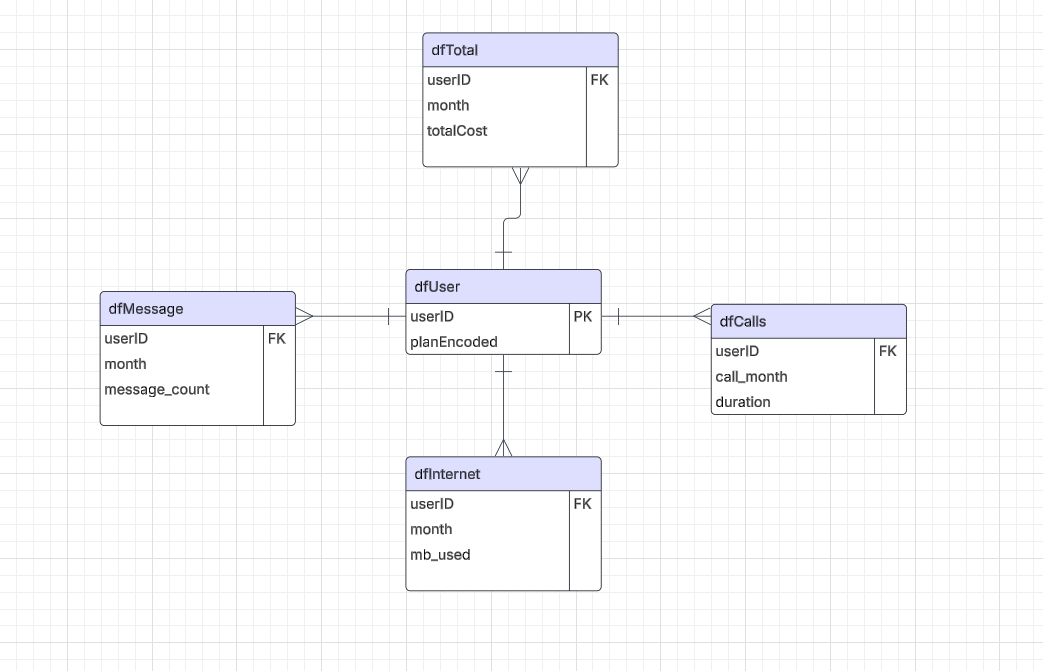

La tabla de df User es la de factos y mediante el usuario se puede acceder al resto de las tablas con el user_id a su respectivo consumo del mes del usuario a su respectivo producto

El df total contiene los costos de cada usuario con su respectivo product_id

#### Export

In [682]:
#export dfs

path = r"C:\DataMining\Examen01\data\clean"

dfCalls.to_csv(path + r"\dfCalls.csv",index=False)
dfInternet.to_csv(path + r"\dfInternet.csv",index=False)
dfMessages.to_csv(path + r"\dfMessages.csv",index=False)
dfPlans.to_csv(path + r"\dfPlans.csv",index=False)
dfUsers.to_csv(path + r"\dfUsers.csv",index=False)
dfTotal.to_csv(path + r"\dfTotal.csv",index=False)
